In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load the input descriptors and output potency values
# input_data = pd.read_csv('./Training_data/input_cathepsin_B.csv', header=None)  # Descriptors (features)
# output_data = pd.read_csv('./Training_data/output_cathepsin_B.csv', header=None)  # Potency values (0, 1, 2, 3)

# Load the input descriptors and output potency values
# input_data = pd.read_csv('./Training_data/input_cathepsin_S.csv', header=None)  # Descriptors (features)
# output_data = pd.read_csv('./Training_data/output_cathepsin_S.csv', header=None)  # Potency values (0, 1, 2, 3)

# Load the input descriptors and output potency values
# input_data = pd.read_csv('./Training_data/input_cathepsin_D.csv', header=None)  # Descriptors (features)
# output_data = pd.read_csv('./Training_data/output_cathepsin_D.csv', header=None)  # Potency values (0, 1, 2, 3)

# # Load the input descriptors and output potency values
input_data = pd.read_csv('./Training_data/input_cathepsin_K.csv', header=None)  # Descriptors (features)
output_data = pd.read_csv('./Training_data/output_cathepsin_K.csv', header=None)  # Potency values (0, 1, 2, 3)

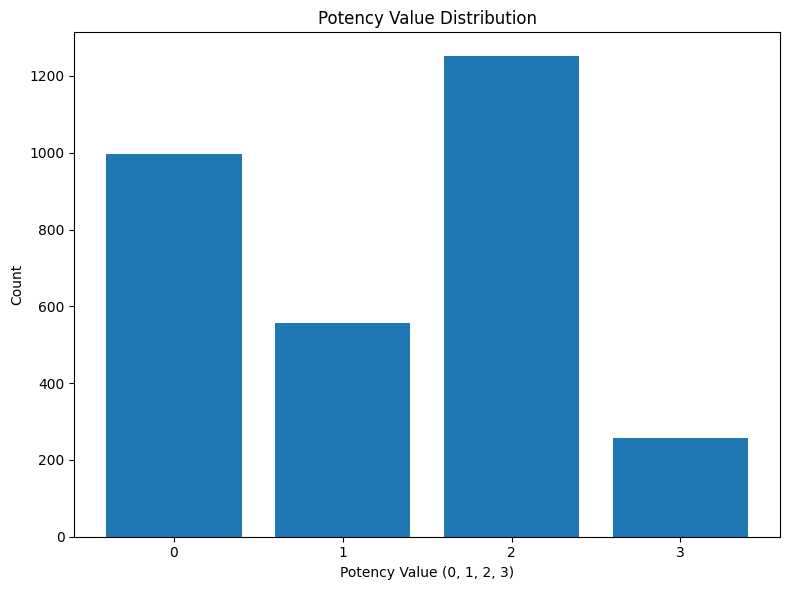

In [42]:
import pandas as pd
import matplotlib.pyplot as plt


# Assuming the values are in a single column
output_labels = output_data[0].values

# Plotting the distribution of potency values
plt.figure(figsize=(8, 6))
plt.hist(output_labels, bins=np.arange(len(np.unique(output_labels)) + 1) - 0.5, rwidth=0.8)
plt.title("Potency Value Distribution")
plt.xlabel("Potency Value (0, 1, 2, 3)")
plt.ylabel("Count")
plt.xticks(range(len(np.unique(output_labels))))

plt.tight_layout()
plt.show()


In [43]:


# Normalize the input data (descriptors)
scaler = MinMaxScaler()
input_data_normalized = scaler.fit_transform(input_data)

# Check for NaNs in the input data
if np.isnan(input_data_normalized).any():
    print("Input data contains NaNs. Imputing missing values...")

# Impute missing values with the mean (or median)
imputer = SimpleImputer(strategy='mean')  # Use 'median' if you prefer median imputation
input_data_imputed = imputer.fit_transform(input_data_normalized)

# Convert output data to a 1D array (labels)
output_data_labels = output_data[0].values

# One-hot encode the output potency values (0 -> [0, 0, 0, 1], 1 -> [0, 0, 1, 0], etc.)
output_data_encoded = pd.get_dummies(output_data_labels, dtype=np.float32).values  # Convert to NumPy array

# Reshape the input data to fit the 1D CNN
input_data_reshaped = input_data_imputed.reshape((input_data_imputed.shape[0], input_data_imputed.shape[1], 1))

# Apply SMOTE to balance the classes (input reshaped to 2D)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(input_data_reshaped.reshape(input_data_reshaped.shape[0], -1), output_data_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# # Compute class weights based on the frequency of each class (optional)
class_weights = {0: 1.0, 1: 7.0, 2: 7.0, 3: 12.0}  # Example, adjust these based on your data distribution

# # Now, you can proceed with training your model using X_train, y_train, X_test, y_test


Input data contains NaNs. Imputing missing values...


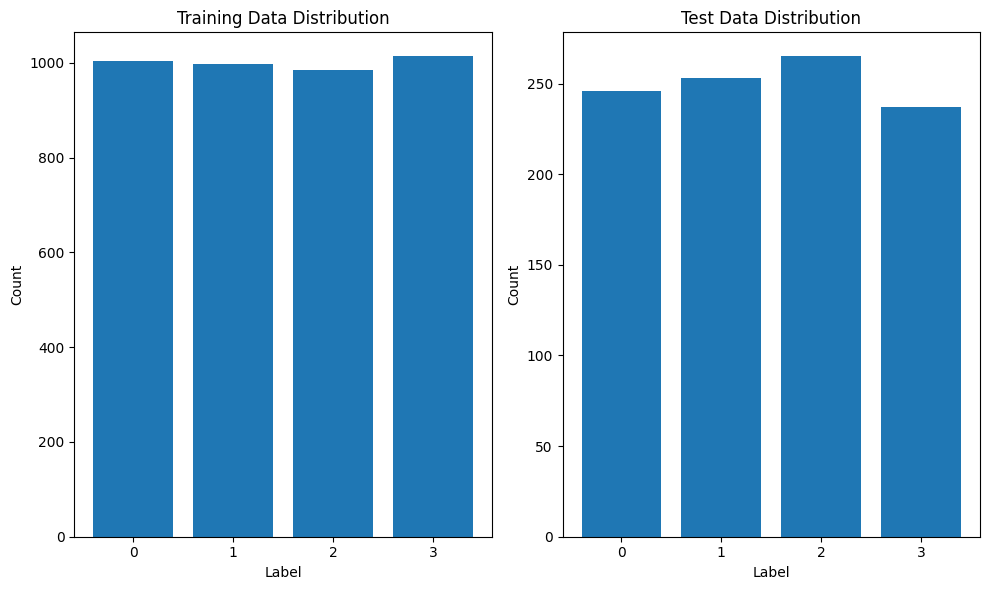

In [44]:
import matplotlib.pyplot as plt
import numpy as np


# Convert one-hot encoded arrays to indices (for easier plotting)
train_labels = np.argmax(y_train, axis=1)
test_labels = np.argmax(y_test, axis=1)

# Plotting the distribution of labels
plt.figure(figsize=(10, 6))

# Plotting for y_train
plt.subplot(1, 2, 1)
plt.hist(train_labels, bins=np.arange(len(np.unique(train_labels)) + 1) - 0.5, rwidth=0.8)
plt.title("Training Data Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(range(len(np.unique(train_labels))))

# Plotting for y_test
plt.subplot(1, 2, 2)
plt.hist(test_labels, bins=np.arange(len(np.unique(test_labels)) + 1) - 0.5, rwidth=0.8)
plt.title("Test Data Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(range(len(np.unique(test_labels))))

plt.tight_layout()
plt.show()


In [45]:
from sklearn.metrics import accuracy_score

### Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

# Initialize and train the model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, np.argmax(y_train, axis=1))

# Predict on the test set (continuous outputs)
y_pred_linear = linear_regressor.predict(X_test)

# Evaluate the model using regression metrics
mse_linear = mean_squared_error(np.argmax(y_test, axis=1), y_pred_linear)
r2_linear = r2_score(np.argmax(y_test, axis=1), y_pred_linear)

print("Linear Regression MSE:", mse_linear)
print("Linear Regression R²:", r2_linear)

# If you want to calculate accuracy (convert continuous outputs to discrete classes)
y_pred_classes = np.round(y_pred_linear).astype(int)  # Round to the nearest class
y_pred_classes = np.clip(y_pred_classes, 0, 3)  # Ensure predictions are within [0, 3]

accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)
print(f"Accuracy of the model (using rounded predictions): {accuracy * 100:.2f}%")


Linear Regression MSE: 0.4361448419858157
Linear Regression R²: 0.64102679638361
Accuracy of the model (using rounded predictions): 61.44%


### Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

# Initialize and train the model
decision_tree = DecisionTreeRegressor(random_state=43)
decision_tree.fit(X_train, np.argmax(y_train, axis=1))

# Predict on the test set
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the model using regression metrics
mse_tree = mean_squared_error(np.argmax(y_test, axis=1), y_pred_tree)
r2_tree = r2_score(np.argmax(y_test, axis=1), y_pred_tree)

print("Decision Tree MSE:", mse_tree)
print("Decision Tree R²:", r2_tree)

# Convert continuous predictions to discrete class labels
y_pred_classes_tree = np.round(y_pred_tree).astype(int)  # Round to nearest integer
y_pred_classes_tree = np.clip(y_pred_classes_tree, 0, 3)  # Clip predictions to valid range [0, 3]

# Calculate accuracy
accuracy_tree = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes_tree)
print(f"Decision Tree Accuracy (using rounded predictions): {accuracy_tree * 100:.2f}%")


Decision Tree MSE: 0.1672819202020304
Decision Tree R²: 0.862317007972372
Decision Tree Accuracy (using rounded predictions): 88.71%


### Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

# Initialize and train the Random Forest model
random_forest = RandomForestRegressor(n_estimators=10, random_state=42)
random_forest.fit(X_train, np.argmax(y_train, axis=1))

# Predict on the test set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model using regression metrics
mse_rf = mean_squared_error(np.argmax(y_test, axis=1), y_pred_rf)
r2_rf = r2_score(np.argmax(y_test, axis=1), y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest R²:", r2_rf)

# Convert continuous predictions to discrete class labels
y_pred_classes_rf = np.round(y_pred_rf).astype(int)  # Round predictions to nearest integer
y_pred_classes_rf = np.clip(y_pred_classes_rf, 0, 3)  # Clip predictions to valid range [0, 3]

# Calculate accuracy (optional classification-like evaluation)
accuracy_rf = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes_rf)
print(f"Random Forest Accuracy (using rounded predictions): {accuracy_rf * 100:.2f}%")


Random Forest MSE: 0.13304168560634896
Random Forest R²: 0.8904987621103431
Random Forest Accuracy (using rounded predictions): 87.01%


### Gradient Boosting Regressor

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

# Initialize and train the Gradient Boosting Regressor
gboost = GradientBoostingRegressor(random_state=42)
gboost.fit(X_train, np.argmax(y_train, axis=1))

# Predict on the test set
y_pred_gboost = gboost.predict(X_test)

# Evaluate the model using regression metrics
mse_gboost = mean_squared_error(np.argmax(y_test, axis=1), y_pred_gboost)
r2_gboost = r2_score(np.argmax(y_test, axis=1), y_pred_gboost)

print("Gradient Boosting MSE:", mse_gboost)
print("Gradient Boosting R²:", r2_gboost)

# Convert continuous predictions to discrete class labels
y_pred_classes_gboost = np.round(y_pred_gboost).astype(int)  # Round predictions to nearest integer
y_pred_classes_gboost = np.clip(y_pred_classes_gboost, 0, 3)  # Clip predictions to valid range [0, 3]

# Calculate accuracy (optional classification-like evaluation)
accuracy_gboost = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes_gboost)
print(f"Gradient Boosting Accuracy (using rounded predictions): {accuracy_gboost * 100:.2f}%")


Gradient Boosting MSE: 0.281185575736265
Gradient Boosting R²: 0.768567509653023
Gradient Boosting Accuracy (using rounded predictions): 70.23%


### k-Nearest Neighbors (kNN) Regressor

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

# Initialize and train the k-Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, np.argmax(y_train, axis=1))

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model using regression metrics
mse_knn = mean_squared_error(np.argmax(y_test, axis=1), y_pred_knn)
r2_knn = r2_score(np.argmax(y_test, axis=1), y_pred_knn)

print("kNN Regression MSE:", mse_knn)
print("kNN Regression R²:", r2_knn)

# Convert continuous predictions to discrete class labels
y_pred_classes_knn = np.round(y_pred_knn).astype(int)  # Round predictions to nearest integer
y_pred_classes_knn = np.clip(y_pred_classes_knn, 0, 3)  # Clip predictions to valid range [0, 3]

# Calculate accuracy (optional classification-like evaluation)
accuracy_knn = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes_knn)
print(f"kNN Regression Accuracy (using rounded predictions): {accuracy_knn * 100:.2f}%")


kNN Regression MSE: 0.21390609390609394
kNN Regression R²: 0.8239425337396604
kNN Regression Accuracy (using rounded predictions): 79.42%


### Support Vector Regression (SVR)

In [51]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

# Initialize and train the Support Vector Regressor
svr = SVR(kernel='rbf')
svr.fit(X_train, np.argmax(y_train, axis=1))

# Predict on the test set
y_pred_svr = svr.predict(X_test)

# Evaluate the model using regression metrics
mse_svr = mean_squared_error(np.argmax(y_test, axis=1), y_pred_svr)
r2_svr = r2_score(np.argmax(y_test, axis=1), y_pred_svr)

print("SVR MSE:", mse_svr)
print("SVR R²:", r2_svr)

# Convert continuous predictions to discrete class labels
y_pred_classes_svr = np.round(y_pred_svr).astype(int)  # Round predictions to nearest integer
y_pred_classes_svr = np.clip(y_pred_classes_svr, 0, 3)  # Clip predictions to valid range [0, 3]

# Calculate accuracy (optional classification-like evaluation)
accuracy_svr = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes_svr)
print(f"SVR Accuracy (using rounded predictions): {accuracy_svr * 100:.2f}%")


SVR MSE: 0.32672661201916436
SVR R²: 0.7310845220839202
SVR Accuracy (using rounded predictions): 72.13%


### Multilayer Perceptron (MLP) Regression

In [52]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

# Initialize and train the Multi-layer Perceptron Regressor
mlp = MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
mlp.fit(X_train, np.argmax(y_train, axis=1))

# Predict on the test set
y_pred_mlp = mlp.predict(X_test)

# Evaluate the model using regression metrics
mse_mlp = mean_squared_error(np.argmax(y_test, axis=1), y_pred_mlp)
r2_mlp = r2_score(np.argmax(y_test, axis=1), y_pred_mlp)

print("MLP Regression MSE:", mse_mlp)
print("MLP Regression R²:", r2_mlp)

# Convert continuous predictions to discrete class labels
y_pred_classes_mlp = np.round(y_pred_mlp).astype(int)  # Round predictions to nearest integer
y_pred_classes_mlp = np.clip(y_pred_classes_mlp, 0, 3)  # Clip predictions to valid range [0, 3]

# Calculate accuracy (optional classification-like evaluation)
accuracy_mlp = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes_mlp)
print(f"MLP Accuracy (using rounded predictions): {accuracy_mlp * 100:.2f}%")


MLP Regression MSE: 0.22719653535957382
MLP Regression R²: 0.8130037081781583
MLP Accuracy (using rounded predictions): 79.62%
